In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '184.1 thousand',
 5: '368.0 thousand',
 10: '534.8 thousand',
 20: '841.6 thousand',
 30: '1.2 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.6 million',
 70: '3.4 million',
 80: '4.6 million',
 90: '7.2 million',
 95: '10.4 million',
 99: '21.0 million'}
-
## Actual GPT-3 estimated to be ##
{1: '184.6 thousand',
 5: '324.7 thousand',
 10: '441.5 thousand',
 20: '638.5 thousand',
 30: '833.6 thousand',
 40: '1.1 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.6 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.3 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.0th percentile of the model
-


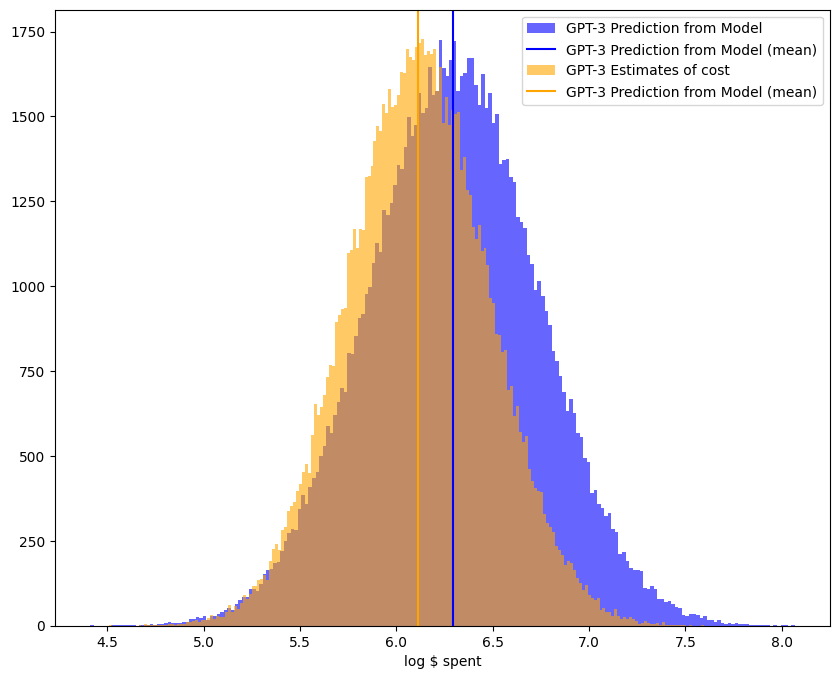

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.6 million',
 5: '5.6 million',
 10: '7.1 million',
 20: '9.3 million',
 30: '11.4 million',
 40: '13.5 million',
 50: '15.8 million',
 60: '18.5 million',
 70: '22.0 million',
 80: '26.8 million',
 90: '35.3 million',
 95: '44.3 million',
 99: '67.7 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.2 million',
 5: '5.8 million',
 10: '7.9 million',
 20: '11.4 million',
 30: '14.8 million',
 40: '18.7 million',
 50: '23.2 million',
 60: '28.8 million',
 70: '36.3 million',
 80: '47.2 million',
 90: '68.3 million',
 95: '92.1 million',
 99: '166.5 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.2th percentile of the model
-


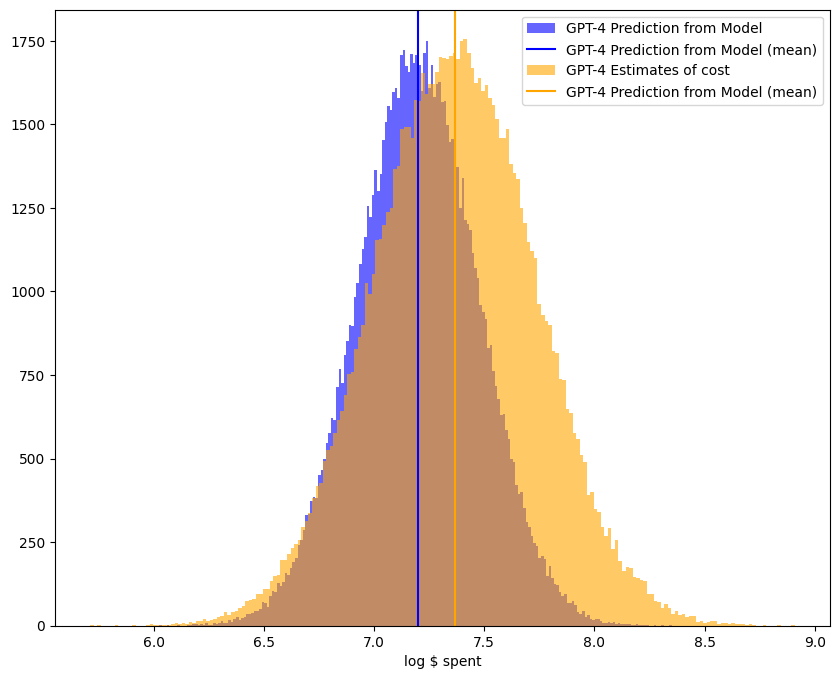

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.4 million',
 5: '7.4 million',
 10: '13.3 million',
 20: '27.4 million',
 30: '46.1 million',
 40: '72.8 million',
 50: '111.0 million',
 60: '168.9 million',
 70: '265.7 million',
 80: '446.6 million',
 90: '899.5 million',
 95: '1.6 billion',
 99: '4.5 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.5 million',
 5: '8.0 million',
 10: '10.9 million',
 20: '15.9 million',
 30: '20.7 million',
 40: '26.0 million',
 50: '32.1 million',
 60: '39.9 million',
 70: '50.1 million',
 80: '65.0 million',
 90: '94.4 million',
 95: '127.6 million',
 99: '231.6 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 22.8th percentile of the model
-


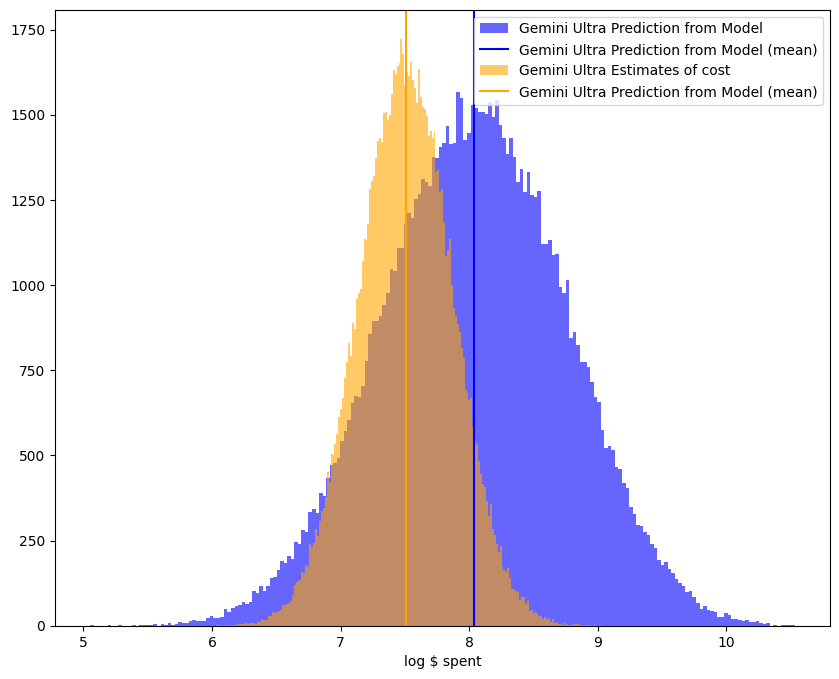

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Model for Largest Training Run in 2025

## SPEND ESTIMATE ##

$112.1 million (80%CI: $34.1 million to $372.2 million)

{1: '13.6 million',
 5: '24.6 million',
 10: '34.1 million',
 20: '51.2 million',
 30: '68.4 million',
 40: '88.1 million',
 50: '111.5 million',
 60: '141.3 million',
 70: '181.7 million',
 80: '245.8 million',
 90: '372.2 million',
 95: '523.3 million',
 99: '968.6 million'}



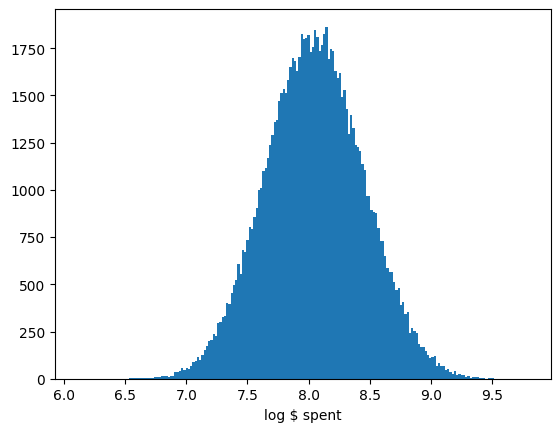



## FLOP ESTIMATE ##

26.85 log FLOP (80%CI: 26.16 to 27.55 log FLOP)

{1: 25.59,
 5: 25.96,
 10: 26.16,
 20: 26.39,
 30: 26.57,
 40: 26.71,
 50: 26.85,
 60: 26.99,
 70: 27.14,
 80: 27.31,
 90: 27.55,
 95: 27.74,
 99: 28.12}



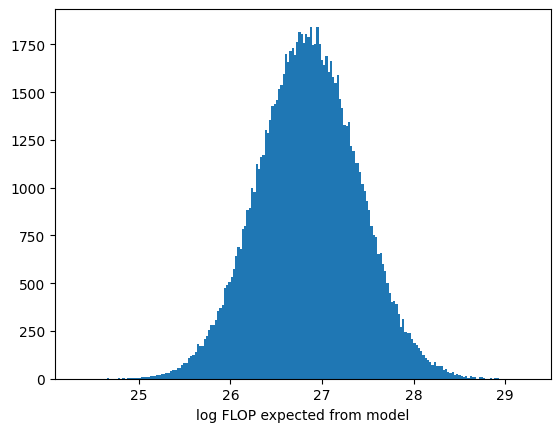

In [5]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 20*B),
                                                                       total_revenue=sq.lognorm(2*B, 4*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$40.4 million (80%CI: $12.2 million to $134.8 million)

{1: '4.5 million',
 5: '8.6 million',
 10: '12.2 million',
 20: '18.4 million',
 30: '24.7 million',
 40: '31.9 million',
 50: '40.4 million',
 60: '51.2 million',
 70: '66.1 million',
 80: '89.3 million',
 90: '134.8 million',
 95: '188.4 million',
 99: '354.7 million'}



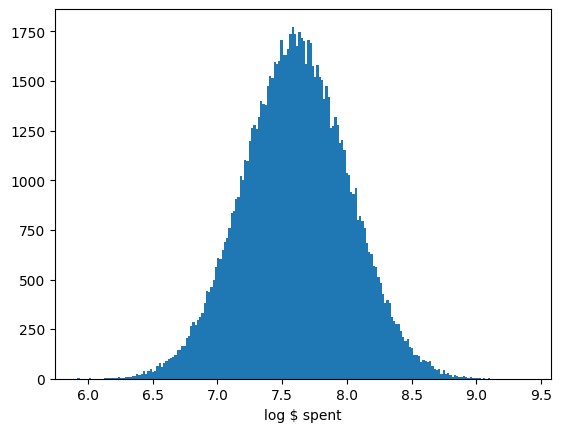



## FLOP ESTIMATE ##

26.41 log FLOP (80%CI: 25.71 to 27.11 log FLOP)

{1: 25.13,
 5: 25.51,
 10: 25.71,
 20: 25.95,
 30: 26.12,
 40: 26.27,
 50: 26.41,
 60: 26.55,
 70: 26.69,
 80: 26.86,
 90: 27.11,
 95: 27.31,
 99: 27.68}



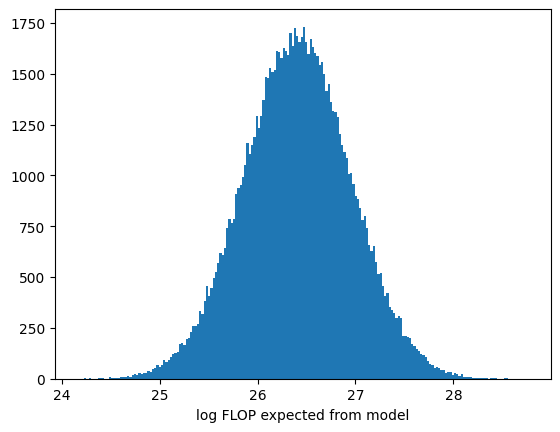

In [6]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(3*B, 8*B),
                                                                          total_revenue=sq.lognorm(1*B, 2*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$120.0 million (80%CI: $14.4 million to $994.7 million)

{1: '2.6 million',
 5: '7.9 million',
 10: '14.4 million',
 20: '30.0 million',
 30: '50.6 million',
 40: '79.2 million',
 50: '121.0 million',
 60: '184.4 million',
 70: '287.3 million',
 80: '478.6 million',
 90: '994.7 million',
 95: '1.8 billion',
 99: '5.1 billion'}



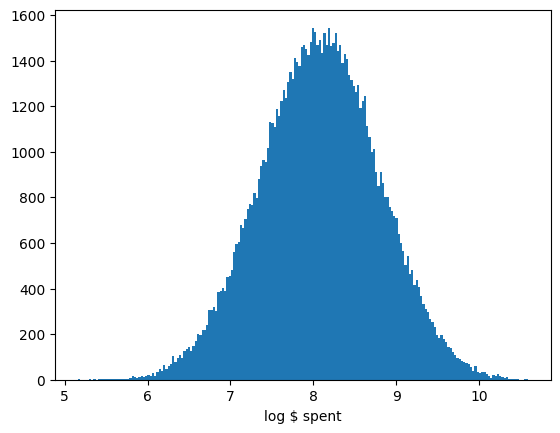



## FLOP ESTIMATE ##

26.88 log FLOP (80%CI: 25.85 to 27.91 log FLOP)

{1: 25.03,
 5: 25.56,
 10: 25.85,
 20: 26.21,
 30: 26.46,
 40: 26.68,
 50: 26.88,
 60: 27.08,
 70: 27.3,
 80: 27.56,
 90: 27.91,
 95: 28.2,
 99: 28.73}



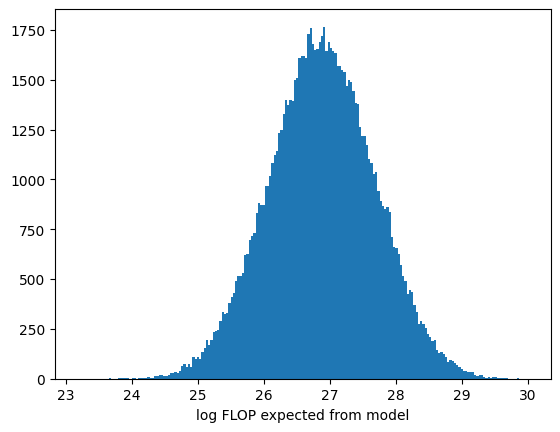

In [7]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 60*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
show_model_forecast(largest_google_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$23.7 million (80%CI: $2.4 million to $266.0 million)

{1: '741.0 thousand',
 5: '1.5 million',
 10: '2.4 million',
 20: '4.6 million',
 30: '8.0 million',
 40: '13.4 million',
 50: '21.9 million',
 60: '35.8 million',
 70: '61.0 million',
 80: '111.8 million',
 90: '266.0 million',
 95: '541.1 million',
 99: '1.9 billion'}



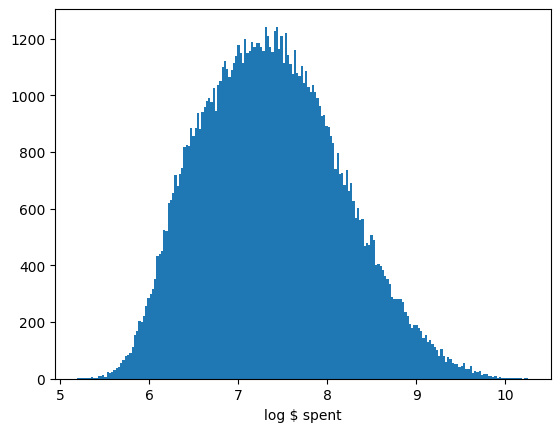



## FLOP ESTIMATE ##

26.18 log FLOP (80%CI: 25.08 to 27.32 log FLOP)

{1: 24.39,
 5: 24.83,
 10: 25.08,
 20: 25.41,
 30: 25.68,
 40: 25.92,
 50: 26.14,
 60: 26.38,
 70: 26.63,
 80: 26.92,
 90: 27.32,
 95: 27.65,
 99: 28.25}



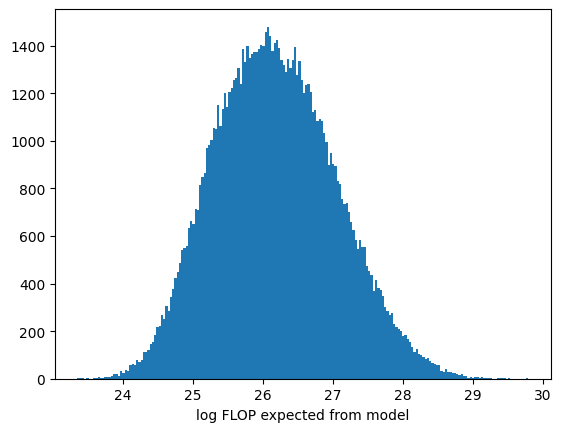

In [8]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 70*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
show_model_forecast(largest_microsoft_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$40.9 million (80%CI: $2.8 million to $579.1 million)

{1: '339.0 thousand',
 5: '1.3 million',
 10: '2.8 million',
 20: '7.1 million',
 30: '13.8 million',
 40: '24.2 million',
 50: '41.1 million',
 60: '70.3 million',
 70: '124.4 million',
 80: '240.3 million',
 90: '579.1 million',
 95: '1.2 billion',
 99: '4.4 billion'}



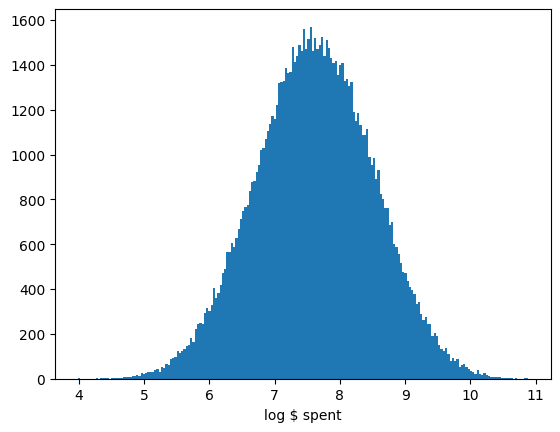



## FLOP ESTIMATE ##

26.41 log FLOP (80%CI: 25.16 to 27.66 log FLOP)

{1: 24.17,
 5: 24.81,
 10: 25.16,
 20: 25.59,
 30: 25.9,
 40: 26.17,
 50: 26.42,
 60: 26.66,
 70: 26.93,
 80: 27.24,
 90: 27.66,
 95: 28.0,
 99: 28.62}



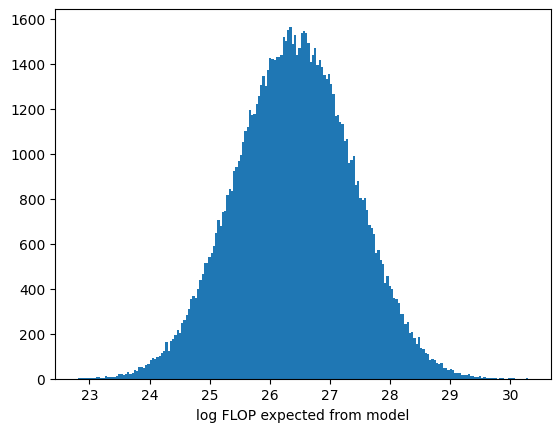

In [9]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 70*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.4),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.2))
show_model_forecast(largest_fb_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$14.0 million (80%CI: $4.2 million to $47.1 million)

{1: '1.6 million',
 5: '3.0 million',
 10: '4.2 million',
 20: '6.3 million',
 30: '8.6 million',
 40: '11.1 million',
 50: '14.0 million',
 60: '17.8 million',
 70: '23.0 million',
 80: '31.0 million',
 90: '47.1 million',
 95: '66.1 million',
 99: '124.1 million'}



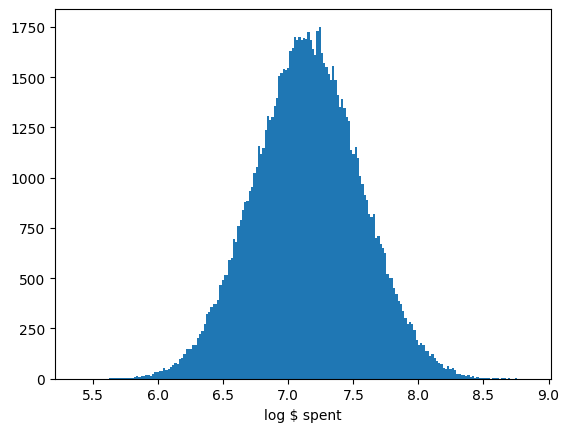



## FLOP ESTIMATE ##

25.95 log FLOP (80%CI: 25.25 to 26.65 log FLOP)

{1: 24.68,
 5: 25.05,
 10: 25.25,
 20: 25.48,
 30: 25.66,
 40: 25.81,
 50: 25.95,
 60: 26.09,
 70: 26.23,
 80: 26.41,
 90: 26.65,
 95: 26.85,
 99: 27.23}



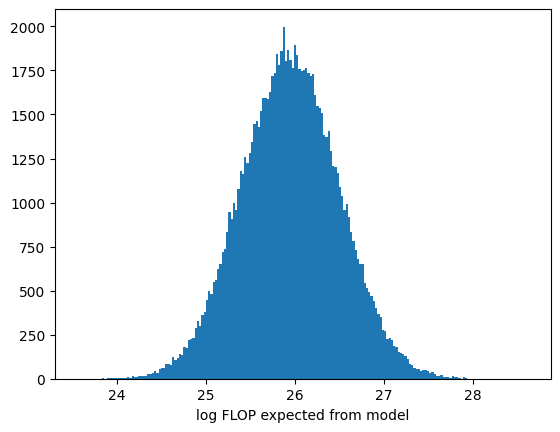

In [10]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(500*M, 2*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.2, sd=0.05))
show_model_forecast(largest_mistral_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$19.9 million (80%CI: $1.6 million to $254.3 million)

{1: '194.0 thousand',
 5: '744.5 thousand',
 10: '1.6 million',
 20: '3.7 million',
 30: '7.0 million',
 40: '12.1 million',
 50: '19.9 million',
 60: '33.0 million',
 70: '56.6 million',
 80: '106.6 million',
 90: '254.3 million',
 95: '522.6 million',
 99: '2.0 billion'}



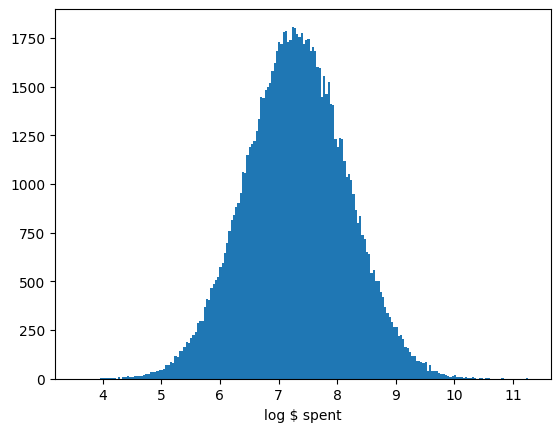



## FLOP ESTIMATE ##

26.1 log FLOP (80%CI: 24.9 to 27.3 log FLOP)

{1: 23.92,
 5: 24.56,
 10: 24.9,
 20: 25.31,
 30: 25.61,
 40: 25.86,
 50: 26.1,
 60: 26.34,
 70: 26.59,
 80: 26.89,
 90: 27.3,
 95: 27.64,
 99: 28.29}



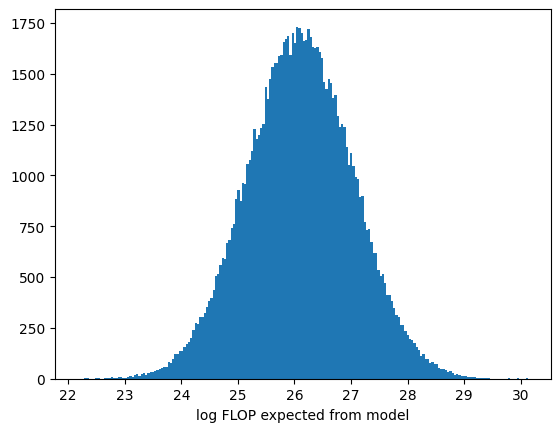

In [11]:
largest_us_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 10*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                     percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
show_model_forecast(largest_us_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$3.4 million (80%CI: $519.2 thousand to $22.4 million)

{1: '120.6 thousand',
 5: '312.3 thousand',
 10: '519.2 thousand',
 20: '977.1 thousand',
 30: '1.5 million',
 40: '2.3 million',
 50: '3.3 million',
 60: '4.8 million',
 70: '7.2 million',
 80: '11.6 million',
 90: '22.4 million',
 95: '38.5 million',
 99: '105.6 million'}



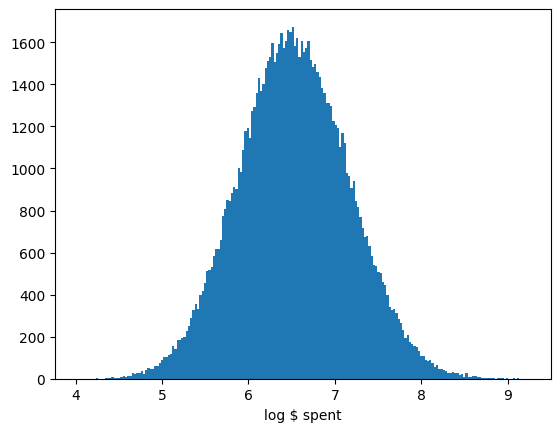



## FLOP ESTIMATE ##

25.33 log FLOP (80%CI: 24.39 to 26.27 log FLOP)

{1: 23.65,
 5: 24.13,
 10: 24.39,
 20: 24.71,
 30: 24.94,
 40: 25.13,
 50: 25.32,
 60: 25.51,
 70: 25.71,
 80: 25.95,
 90: 26.27,
 95: 26.54,
 99: 27.04}



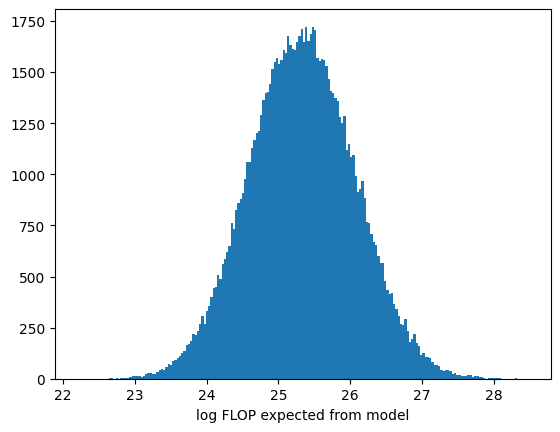

In [12]:
largest_uk_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(500*M, 10*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.01))
show_model_forecast(largest_uk_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$13.6 million (80%CI: $1.3 million to $143.7 million)

{1: '187.2 thousand',
 5: '644.6 thousand',
 10: '1.3 million',
 20: '2.9 million',
 30: '5.1 million',
 40: '8.5 million',
 50: '13.5 million',
 60: '21.5 million',
 70: '35.8 million',
 80: '64.2 million',
 90: '143.7 million',
 95: '282.6 million',
 99: '1.0 billion'}



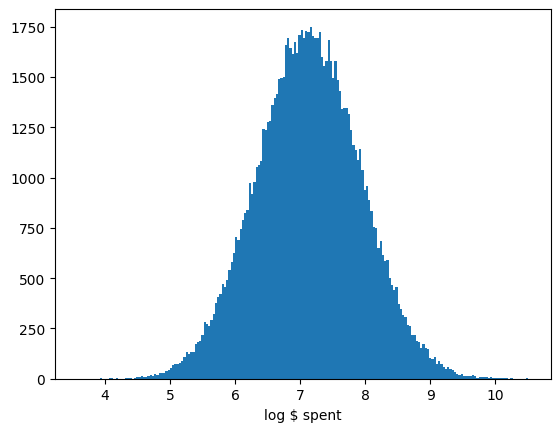



## FLOP ESTIMATE ##

25.93 log FLOP (80%CI: 24.8 to 27.07 log FLOP)

{1: 23.88,
 5: 24.49,
 10: 24.8,
 20: 25.19,
 30: 25.47,
 40: 25.71,
 50: 25.93,
 60: 26.15,
 70: 26.39,
 80: 26.68,
 90: 27.07,
 95: 27.39,
 99: 27.99}



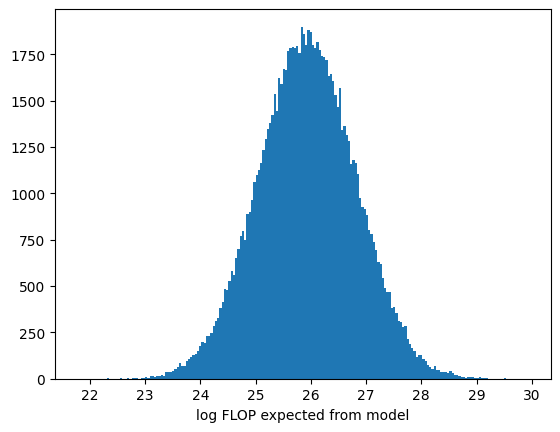

In [13]:
largest_china_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(1*B, 50*B, credibility=80),
                                                                        percent_r_and_d_on_ai=1,
                                                                        percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                        percent_compute_on_biggest_model=pct_dist(0.01, 0.1))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_china_gov_prediction = sq.dist_max(0, largest_china_gov_prediction - sq.norm(0.5, 1.5, lclip=0.05, rclip=1))

show_model_forecast(largest_china_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$22.0 million (80%CI: $3.0 million to $308.1 million)

{1: '1.3 million',
 5: '2.2 million',
 10: '3.0 million',
 20: '4.7 million',
 30: '6.8 million',
 40: '9.7 million',
 50: '14.3 million',
 60: '23.3 million',
 70: '44.9 million',
 80: '101.0 million',
 90: '308.1 million',
 95: '765.8 million',
 99: '3.8 billion'}



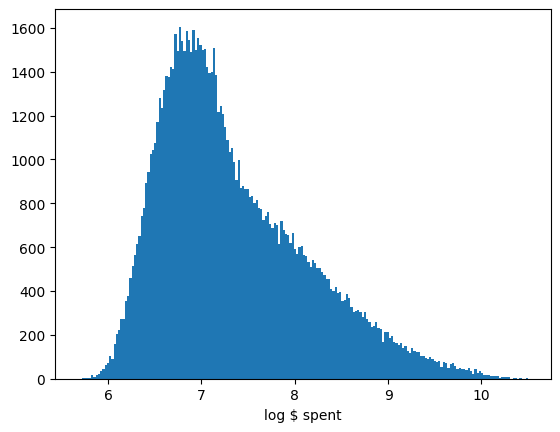



## FLOP ESTIMATE ##

26.14 log FLOP (80%CI: 25.14 to 27.37 log FLOP)

{1: 24.56,
 5: 24.93,
 10: 25.14,
 20: 25.41,
 30: 25.62,
 40: 25.81,
 50: 26.01,
 60: 26.23,
 70: 26.5,
 80: 26.86,
 90: 27.37,
 95: 27.78,
 99: 28.53}



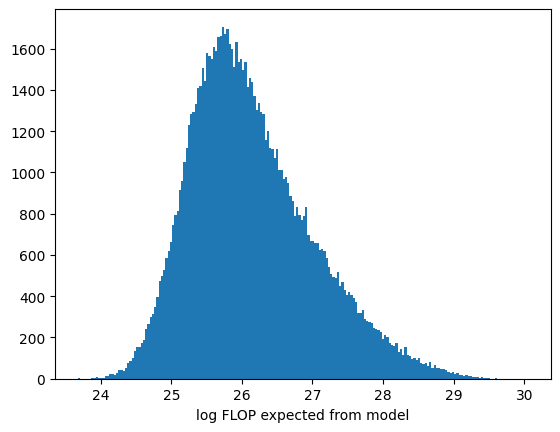

In [14]:
largest_arab_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(30*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=1,
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.0001, 0.05))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_arab_gov_prediction = sq.dist_max(0, largest_arab_gov_prediction - sq.norm(0.05, 1, lclip=0.05, rclip=1))

show_model_forecast(largest_arab_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$492.9 million (80%CI: $135.2 million to $2.2 billion)

{1: '62.2 million',
 5: '102.1 million',
 10: '135.2 million',
 20: '194.5 million',
 30: '259.3 million',
 40: '337.9 million',
 50: '438.1 million',
 60: '578.1 million',
 70: '793.3 million',
 80: '1.2 billion',
 90: '2.2 billion',
 95: '3.6 billion',
 99: '9.1 billion'}



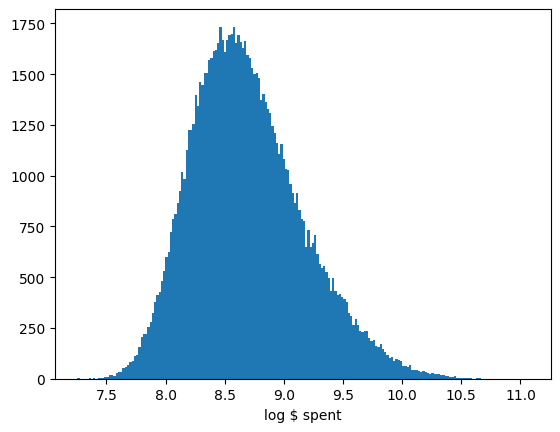



## FLOP ESTIMATE ##

27.49 log FLOP (80%CI: 26.75 to 28.28 log FLOP)

{1: 26.22,
 5: 26.56,
 10: 26.75,
 20: 26.99,
 30: 27.16,
 40: 27.31,
 50: 27.46,
 60: 27.61,
 70: 27.78,
 80: 27.98,
 90: 28.28,
 95: 28.53,
 99: 28.99}



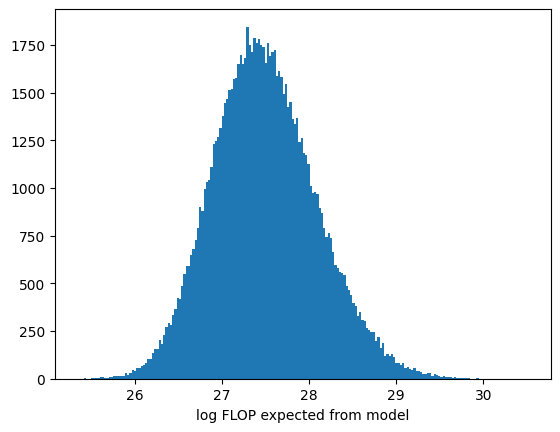

In [15]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(largest_us_gov_prediction) >>
               sq.dist_max(largest_uk_gov_prediction) >>
               sq.dist_max(largest_arab_gov_prediction) >>
               sq.dist_max(largest_china_gov_prediction))

show_model_forecast(mixed_model @ (100*K))

In [16]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['US', largest_us_gov_prediction],
          ['UK', largest_uk_gov_prediction],
          ['Arab', largest_arab_gov_prediction],
          ['China', largest_china_gov_prediction]]

print('## % of having largest model ##')
labels = [m[0] for m in models]
model_sizes_log = np.array([m[1] @ 100_000 for m in models])
max_indices = np.argmax(model_sizes_log, axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
pprint(label_percentages)
print('')
print('')

print('## % of being frontier (within 1OOM of largest model) ##')
max_log_sizes = np.max(model_sizes_log, axis=0)
within_one_OOM = (model_sizes_log >= (max_log_sizes - 1))
within_one_OOM_counts = np.sum(within_one_OOM, axis=1)
total_samples = model_sizes_log.shape[1]  # Total number of samples
label_percentages_within_one_OOM = {label: f"{round((count / total_samples) * 100, 1)}%" for label, count in zip(labels, within_one_OOM_counts)}
pprint(label_percentages_within_one_OOM)

## % of having largest model ##
{'Anthropic': '3.6%',
 'Arab': '9.4%',
 'China': '4.6%',
 'Google': '30.0%',
 'Meta': '16.2%',
 'Microsoft': '8.3%',
 'Mistral': '0.3%',
 'OpenAI': '19.2%',
 'UK': '0.2%',
 'US': '8.2%'}


## % of being frontier (within 1OOM of largest model) ##
{'Anthropic': '46.5%',
 'Arab': '32.9%',
 'China': '28.1%',
 'Google': '73.9%',
 'Meta': '50.5%',
 'Microsoft': '37.3%',
 'Mistral': '18.7%',
 'OpenAI': '74.3%',
 'UK': '6.9%',
 'US': '35.9%'}


## Cache spend model

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 7.8,
 5: 8.0,
 10: 8.1,
 20: 8.3,
 30: 8.4,
 40: 8.5,
 50: 8.6,
 60: 8.8,
 70: 8.9,
 80: 9.1,
 90: 9.3,
 95: 9.5,
 99: 9.9}


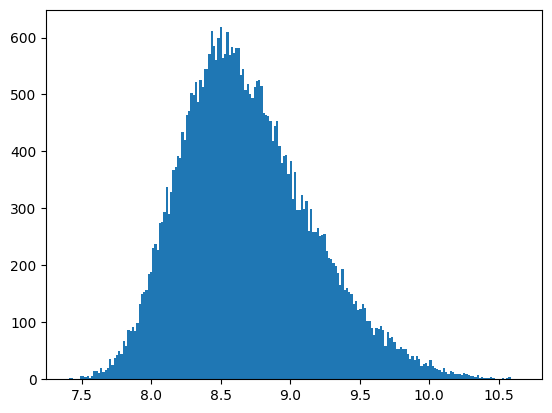

In [17]:
# Output expected willingness to pay for a model in 2025, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## Appendix

## SPEND ESTIMATE ##

$5.0 billion (80%CI: $2.6 billion to $9.7 billion)

{1: '1.5 billion',
 5: '2.1 billion',
 10: '2.6 billion',
 20: '3.2 billion',
 30: '3.8 billion',
 40: '4.4 billion',
 50: '5.0 billion',
 60: '5.7 billion',
 70: '6.6 billion',
 80: '7.7 billion',
 90: '9.7 billion',
 95: '11.7 billion',
 99: '16.6 billion'}



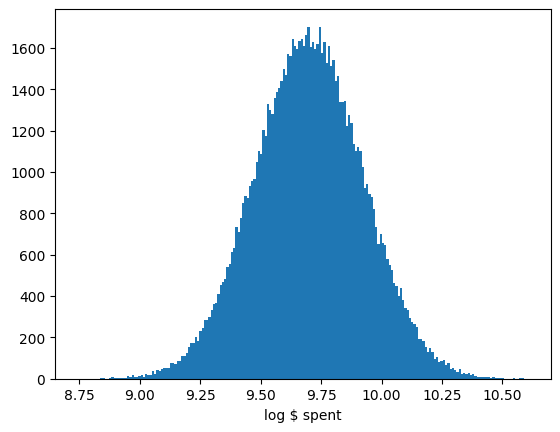



## FLOP ESTIMATE ##

28.5 log FLOP (80%CI: 27.95 to 29.05 log FLOP)

{1: 27.51,
 5: 27.8,
 10: 27.95,
 20: 28.14,
 30: 28.27,
 40: 28.39,
 50: 28.5,
 60: 28.61,
 70: 28.72,
 80: 28.86,
 90: 29.05,
 95: 29.21,
 99: 29.49}



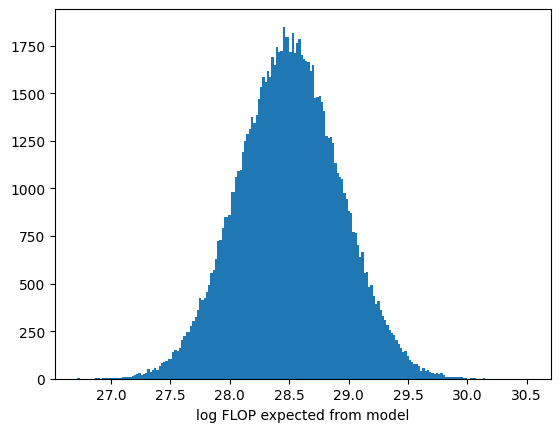

In [18]:
stargate = lab_spend_on_largest_model_this_year(total_investment=100*B,
                                                total_revenue=0,
                                                percent_investment_spent_this_year=1,
                                                percent_revenue_that_is_profit=0,
                                                percent_profit_spent_this_year=0,
                                                percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(stargate @ (100*K))

In [19]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-30 10:04:34.104604
